In [86]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import numpy as np


In [46]:
### data pre-processing -- read data from files - single 
# json analyis 
participant= 1
fileAdd = './cleanjson/P'+str(participant)+'.json'
data = pd.read_json(fileAdd)
# print(data['data'])
test = json_normalize(data['data'])
# print(test)
df = pd.DataFrame.from_dict(test, orient='columns')

L1 = df.loc[(df['index']<=21)|(df['index']>=24)&(df['index']<=45)]
L2 = df.loc[(df['index']>=46)&(df['index']<=99)]
L3 = df.loc[(df['index']>=120)&(df['index']<=153)]
print(L1.describe())
print(L2.describe())
print(L3.describe())

index                       src  score  duration_ms  \
0        1  ./assets/false/2-999.jpg      1         1607   
1        2  ./assets/false/2-998.jpg      1         1285   
2        3  ./assets/false/2-997.jpg      1         1118   
3        4  ./assets/false/2-996.jpg      1          874   
4        5  ./assets/icons/2-019.jpg      1         1214   
..     ...                       ...    ...          ...   
148    149  ./assets/icons/8-088.jpg      1          706   
149    150  ./assets/icons/8-090.jpg      1          955   
150    151  ./assets/icons/8-095.jpg      1         1087   
151    152  ./assets/false/8-975.jpg      1          897   
152    153  ./assets/icons/8-102.jpg      1         1494   

                    startTime                   endTime  
0    2018-11-27T20:14:06.575Z  2018-11-27T20:14:08.182Z  
1    2018-11-27T20:14:15.185Z  2018-11-27T20:14:16.470Z  
2    2018-11-27T20:14:23.473Z  2018-11-27T20:14:24.591Z  
3    2018-11-27T20:14:31.596Z  2018-11-27T20:14:32.4

In [75]:
### data pre-processing -- read data from file - group
M1 = []
M2 = []
M3 = []
for p in range(1,15):
    fileAdd = './cleanjson/P'+str(p)+'.json'
    data = pd.read_json(fileAdd)
    test = json_normalize(data['data'])
    df = pd.DataFrame.from_dict(test, orient='columns')
    L1 = df.loc[(df['index']<=21)|(df['index']>=24)&(df['index']<=45)]
    L2 = df.loc[(df['index']>=46)&(df['index']<=99)]
    L3 = df.loc[(df['index']>=120)&(df['index']<=153)]  

    mean_L1 = L1['score'].mean()
    mean_L2 = L2['score'].mean()
    mean_L3 = L3['score'].mean()
    M1.append(mean_L1)
    M2.append(mean_L2)
    M3.append(mean_L3)
print(M1)
print(M2)
print(M3)

[0.8372093023255814, 0.9069767441860465, 0.8372093023255814, 0.8837209302325582, 0.8604651162790697, 0.8372093023255814, 0.9302325581395349, 0.8604651162790697, 0.9302325581395349, 1.0, 0.9767441860465116, 0.9302325581395349, 0.7906976744186046, 0.9534883720930233]
[0.8333333333333334, 0.8333333333333334, 0.9259259259259259, 0.9074074074074074, 0.7962962962962963, 0.8333333333333334, 0.8518518518518519, 0.8888888888888888, 0.8888888888888888, 0.9259259259259259, 0.8333333333333334, 0.8703703703703703, 0.7962962962962963, 0.9259259259259259]
[0.7647058823529411, 0.9117647058823529, 0.9117647058823529, 0.7941176470588235, 0.8823529411764706, 0.8529411764705882, 0.7647058823529411, 0.8529411764705882, 0.9117647058823529, 0.8529411764705882, 0.8529411764705882, 0.7647058823529411, 0.9117647058823529, 0.8235294117647058]


L1    0.895349
L2    0.865079
L3    0.846639
dtype: float64


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

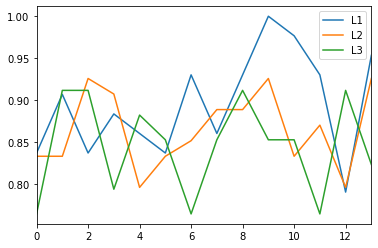

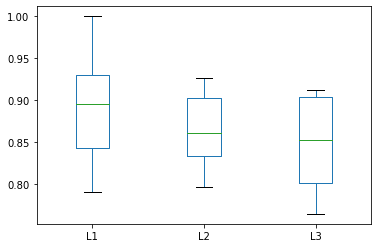

In [76]:
### data pre-processing -- data visualization
Mean_data = {'L1':M1,
'L2':M2,
'L3':M3}
df_accuracy = pd.DataFrame(Mean_data)
print(df_accuracy.mean())
fig =plt.figure()
df_accuracy.plot()
fig =plt.figure()
df_accuracy.boxplot(grid=False)

In [79]:
### one way anova  by stats 
# load packages
import scipy.stats as stats
d = df_accuracy
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['L1'], d['L2'], d['L3'])
print(fvalue, pvalue)


# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['L1', 'L2', 'L3'])
# replace column names
d_melt.columns = ['index', 'Levels', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Levels)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

2.799457954149204 0.07310312529575023


,sum_sq,df,F,PR(>F)
C(Levels),0.016935,2.0,2.799458,0.073103
Residual,0.117965,39.0,NaN,NaN


In [134]:
### one way anova and post hoc test  by pingouin 
import pingouin as pg
from pingouin import pairwise_tukey
# perform multiple pairwise comparison (Tukey HSD)
# for unbalanced (unequal sample size) data, pairwise_tukey uses Tukey-Kramer test
anova = d_melt.anova(dv='value', between='Levels', detailed=False,effsize='n2')
print(anova)
print()
m_comp = pairwise_tukey(data=d_melt, dv='value', between='Levels')
print(m_comp)

Source  ddof1  ddof2         F     p-unc       np2
0  Levels      2     39  2.799458  0.073103  0.125539

    A   B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0  L1  L2  0.895349  0.865079  0.030269  0.020787  1.456163  0.314128   
1  L1  L3  0.895349  0.846639  0.048710  0.020787  2.343284  0.052193   
2  L2  L3  0.865079  0.846639  0.018441  0.020787  0.887121  0.636678   

     hedges  
0  0.534347  
1  0.859882  
2  0.325534  


In [101]:
### within subjects data arrangement 
subject = range(1,15)
L1_fill = np.full((14),1)
data1 = {'Subjects':subject,'Levels':L1_fill,'Accuracy':M1}
df_r = pd.DataFrame(data1)
# print(df_r)
L1_fill = np.full((14),2)
data2 = {'Subjects':subject,'Levels':L1_fill,'Accuracy':M2}
df_r2 = pd.DataFrame(data2)
df_all = df_r.append(df_r2,ignore_index=True)
# print(df_r2)
L1_fill = np.full((14),3)
data3 = {'Subjects':subject,'Levels':L1_fill,'Accuracy':M3}
df_r3 = pd.DataFrame(data3)
df_all  = df_all.append(df_r3,ignore_index=True)
print(df_all)

Subjects  Levels  Accuracy
0          1       1  0.837209
1          2       1  0.906977
2          3       1  0.837209
3          4       1  0.883721
4          5       1  0.860465
5          6       1  0.837209
6          7       1  0.930233
7          8       1  0.860465
8          9       1  0.930233
9         10       1  1.000000
10        11       1  0.976744
11        12       1  0.930233
12        13       1  0.790698
13        14       1  0.953488
14         1       2  0.833333
15         2       2  0.833333
16         3       2  0.925926
17         4       2  0.907407
18         5       2  0.796296
19         6       2  0.833333
20         7       2  0.851852
21         8       2  0.888889
22         9       2  0.888889
23        10       2  0.925926
24        11       2  0.833333
25        12       2  0.870370
26        13       2  0.796296
27        14       2  0.925926
28         1       3  0.764706
29         2       3  0.911765
30         3       3  0.911765
31         4

<AxesSubplot:xlabel='Levels', ylabel='Accuracy'>

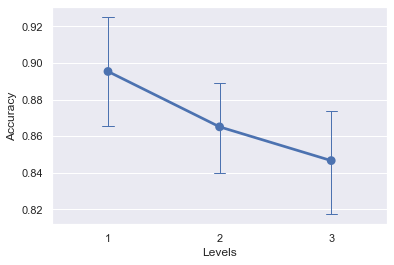

In [124]:
### within subjects data visualization 
import seaborn as sns
sns.set()
sns.pointplot(data=df_all, x='Levels', y='Accuracy',dodge=True, capsize=.1, errwidth=1 )

In [138]:
### repeated measure anova by pingouin

import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.rm_anova(dv='Accuracy', within='Levels', subject='Subjects', data=df_all,effsize='n2')

# Pretty printing of ANOVA summary
pg.print_table(aov)



ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc     n2    eps
--------  -------  -------  -----  -------  -----  -----
Levels          2       26  2.855    0.076  0.180  0.805



In [104]:
## old methods 

# from statsmodels.stats.anova import AnovaRM

# #perform the repeated measures ANOVA
# print(AnovaRM(data=df_all, depvar='Accuracy', subject='Subjects', within=['Levels']).fit())

Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Levels  2.8547 2.0000 26.0000 0.0757

